- Name : ANMOL NARAYAN


# PCA Machine Learning
1. Write a function for PCA. The function should take data, the percentage of variance to retain as inputs, and should return the data in the reduced space.
---



# Loading Dataset

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('Sonar.csv')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


- Perform PCA on the given data and return the reduced data that retains the specified percentage of variance
- Parameters:
  - data (numpy array): The input data with shape (n_samples, n_features).
  - variance_threshold (float): The percentage of variance to retain (between 0 and 1)
  - Returns:
    - reduced_data (numpy array): The data transformed into the reduced space.
    n_components (int): The number of components used to retain the specified variance.
    explained_variance (numpy array): The amount of variance explained by each of the selected components.

In [23]:
import numpy as np

def pca_with_variance(data, variance_threshold):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    covariance_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    selected_eigenvectors = eigenvectors[:, :n_components]
    reduced_data = np.dot(centered_data, selected_eigenvectors)
    explained_variance = eigenvalues[:n_components] / np.sum(eigenvalues)
    return reduced_data, n_components, explained_variance, selected_eigenvectors, mean,eigenvalues


In [24]:


reduced_data, n_components, explained_variance, selected_eigenvectors, mean ,eigenvalues = pca_with_variance(df, 0.5)

In [17]:
df.shape

(208, 61)

In [56]:
reduced_data.shape

(150, 2)

In [57]:
pd.DataFrame(reduced_data)

,0,1
0,2.561012,0.006922
1,2.561012,0.006922
2,2.653190,-0.031850
3,2.468834,0.045694
4,2.561012,0.006922
...,...,...
145,-1.755953,-0.455479
146,-1.416510,-0.164312
147,-1.639637,-0.178946
148,-1.940308,-0.377936


 2. In the Iris dataset, choose the first 2 features, i.e. sepal length and sepal width.
	1.  Run your code on this Iris dataset and retain the first two PCs.
	2.  Plot the data points in the original space. Further, plot the principal components in the original space and show the transformed data.
---


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data[:, :2]  # Select the first two features: sepal length and sepal width

# Display the first few rows of the data
print("First few rows of the data:")
print(data[:5])

First few rows of the data:
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [70]:
data = iris.data[:, :2] # Select the first two features
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [71]:
reduced_data, n_components, explained_variance, selected_eigenvectors, mean,eigenvalues = pca_with_variance(data, variance_threshold=1.0)
print("\nNumber of components retained:", n_components)
print("Explained variance by each component:", explained_variance)


Number of components retained: 2
Explained variance by each component: [0.78716571 0.21283429]


In [72]:
mean

array([5.84333333, 3.05733333])

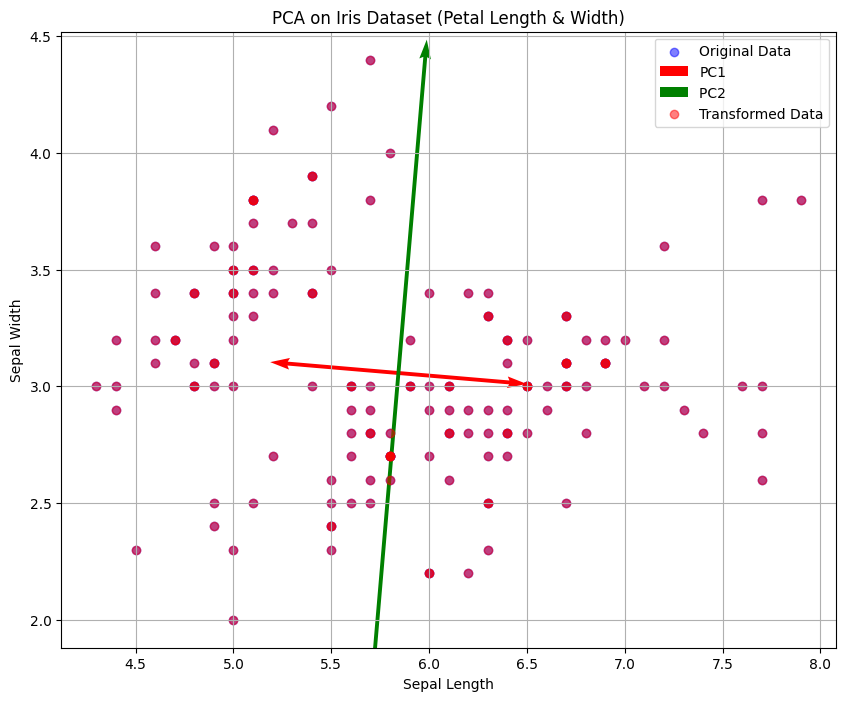

In [75]:
plt.figure(figsize=(10, 8))

# Plot the original data
plt.scatter(data[:, 0], data[:, 1], label="Original Data", alpha=0.5, color='blue')

# Define origin and principal component vectors (PC1 and PC2)
origin = mean  # Origin is the mean of the data
pc1 = selected_eigenvectors[:, 0] * np.sqrt(eigenvalues[0])  # First principal component
pc2 = selected_eigenvectors[:, 1] * np.sqrt(eigenvalues[1])  # Second principal component

# Plot arrows in both positive and negative directions for PC1 and PC2 using plt.quiver
plt.quiver(*origin, *pc1, color='r', scale=5, label="PC1", width=0.005)
plt.quiver(*origin, *-pc1, color='r', scale=5, label="", width=0.005)
plt.quiver(*origin, *pc2, color='g', scale=1, label="", width=0.005)
plt.quiver(*origin, *-pc2, color='g', scale=1, label="PC2 ", width=0.005)

# Plot the transformed data (projected back)
transformed_back = np.dot(reduced_data, selected_eigenvectors.T) + mean
plt.scatter(transformed_back[:, 0], transformed_back[:, 1], label="Transformed Data", alpha=0.5, color='red')

# Labels and legend
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('PCA on Iris Dataset (Petal Length & Width)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


3. Compute the percentage of variance captured by the PCs in question 2.
	1. Calculate the Minimum Squared Error when retaining only the first PC.
---

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data[:, :2]  # Select the first two features: sepal length and sepal width


# Perform PCA retaining 2 components
reduced_data, n_components, explained_variance, eigenvectors, mean,eigenvalues = pca_with_variance(data, variance_threshold=1.0)

# a) Percentage of variance captured by each PC
total_variance = np.sum(eigenvalues)
variance_captured = eigenvalues / total_variance

print("Percentage of variance captured by each PC:")
for i, variance in enumerate(variance_captured):
    print(f"PC{i + 1}: {variance * 100:.2f}%")

# b) Calculate the Minimum Squared Error (MSE) when retaining only the first PC
mean = np.mean(data, axis=0)
centered_data = data - mean
first_pc = eigenvectors[:, 0]  # The first principal component (PC1)
projected_data = np.dot(centered_data, first_pc)
reconstructed_data = np.outer(projected_data, first_pc) + mean
squared_errors = np.sum((data - reconstructed_data) ** 2, axis=1)
mse = np.mean(squared_errors)

print(f"\nMinimum Squared Error (MSE) when retaining only the first PC: {mse:.4f}")

Percentage of variance captured by each PC:
PC1: 78.72%
PC2: 21.28%

Minimum Squared Error (MSE) when retaining only the first PC: 0.1851
